# **1000-719bMSB Modeling of Complex Biological Systems**
# **Deep Neural Network: Spatial Transcriptomics**

# Spatial Transcriptomics

We are going to reproduce the results from the presentation.  
Download the ST data from [the author's website](https://www.spatialresearch.org/resources-published-datasets/doi-10-1126science-aaf2403/)

Load the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#file = 'drive/MyDrive/Colab Notebooks/Rep01_MOB_count_matrix-1.tsv'
file = '/content/drive/MyDrive/Colab Notebooks/Rep1_MOB_count_matrix-1.tsv'
data_orig = pd.read_csv(file, sep='\t') 

In [4]:
data_orig

,Unnamed: 0,Nop58,Arl6ip4,Lix1,Chrm1,Nap1l1,Kat6a,Fam134c,Lrpprc,Srgap3,...,Gm5431,A630033H20Rik,Srd5a2,Olfr128,Sult5a1,Slc14a2,Lgals12,Gm14124,Olfr699,Zp3r
0,17.002x8.987,1,5,4,2,2,1,8,1,3,...,0,0,0,0,0,0,0,0,0,0
1,17.889x8.992,0,1,2,2,4,8,0,0,10,...,0,0,0,0,0,0,0,0,0,0
2,19.855x8.988,1,0,0,1,2,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,18.9x8.977,0,0,2,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,20.909x10.916,0,0,1,0,4,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,24.027x12.93,0,0,7,0,6,2,1,0,9,...,0,0,0,0,0,0,0,0,0,0
263,24.002x13.934,0,0,0,0,6,11,0,8,12,...,0,0,0,0,0,0,0,0,0,0
264,26.06x19.962,1,0,2,0,1,0,2,0,7,...,0,0,0,0,0,0,0,0,0,0
265,26.098x18.948,0,0,0,0,3,0,0,0,1,...,1,4,0,0,0,0,0,0,0,0


### Some python list and pandas basics

List comprehensions are a concise way to create new lists from existing ones.

In [97]:
list1 = list(range(0,10))
print(list1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [98]:
list1[2]

2

In [99]:
list1[2:5]

[2, 3, 4]

In [100]:
list2 = []
for i in list1:
    list2.append(i+1)
    
print(list2)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [101]:
list3 = [i+1 for i in list1]

print(list3)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


With pandas we can load, analyze and manipulate data

In [102]:
data_orig['Nop58'][:10]

0    1
1    0
2    1
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Nop58, dtype: int64

In [103]:
data_orig.columns

Index(['Unnamed: 0', 'Nop58', 'Arl6ip4', 'Lix1', 'Chrm1', 'Nap1l1', 'Kat6a',
       'Fam134c', 'Lrpprc', 'Srgap3',
       ...
       'Gm5431', 'A630033H20Rik', 'Srd5a2', 'Olfr128', 'Sult5a1', 'Slc14a2',
       'Lgals12', 'Gm14124', 'Olfr699', 'Zp3r'],
      dtype='object', length=16574)

In [104]:
names = list(data_orig.columns[1:]) #extract gene names
print(names[:10])

['Nop58', 'Arl6ip4', 'Lix1', 'Chrm1', 'Nap1l1', 'Kat6a', 'Fam134c', 'Lrpprc', 'Srgap3', 'Slc1a3']


In [105]:
#Elements of the dataset can be accessed with .iloc[row, column]
data_orig.iloc[0,1]

1

In [106]:
arr1 = np.array(data_orig)
print(arr1[0,1])

1


In [107]:
#.. or using column names via .loc[row, column name]
data_orig.loc[2:4,'Penk']

2    0
3    4
4    0
Name: Penk, dtype: int64

In [108]:
#To obtain all elements in a column use .iloc[:,column]
data_orig.iloc[:,1]

0      1
1      0
2      1
3      0
4      0
      ..
262    0
263    0
264    1
265    0
266    0
Name: Nop58, Length: 267, dtype: int64

### Cast into matrix form

The data is formatted such that the first column gives the pair of coordinates and subsequent coordinates the gene count.  
For our purposes it will be more convenient to bring the data into matrix form, one matrix for each gene and the entries of the matrices are the counts for this gene at each position.

In [113]:
coord1 = data_orig.iloc[0,0]
print(coord1)

17.002x8.987


In [114]:
coord1.partition('x')

('17.002', 'x', '8.987')

In [115]:
x = [float(i.partition('x')[0]) for i in data_orig.iloc[:,0]]
y = [float(i.partition('x')[2]) for i in data_orig.iloc[:,0]]

In [116]:
print('x: ', x[:10])
print('y: ', y[:10])

x:  [17.002, 17.889, 19.855, 18.9, 20.909, 20.929, 20.903, 20.899, 18.907, 19.904]
y:  [8.987, 8.992, 8.988, 8.977, 10.916, 9.917, 12.897, 11.92, 9.97, 9.992]


In [117]:
# since coordinates are non-integer we need to round them
x_round = [int(i+0.5) for i in x] 
y_round = [int(i+0.5) for i in y]

In [118]:
print('x: ', x_round[:10])
print('y: ', y_round[:10])

x:  [17, 18, 20, 19, 21, 21, 21, 21, 19, 20]
y:  [9, 9, 9, 9, 11, 10, 13, 12, 10, 10]


In [123]:
data = []
    
#loop over genes
for i in range(1,data_orig.shape[1]):
    mat = np.zeros([32,32])
    #fill spatial arrays for each gene
    for x_, y_, val in zip(x_round, y_round, data_orig.iloc[:,i]):
        mat[y_,x_] = val
    #scaling the data on each gene from 0 to 1
    mat = mat/(mat.max())
    data.append(mat)
data = np.array(data)

In [120]:
data.shape

(16573, 32, 32)

In [121]:
gene_id = names.index('Penk')
print(gene_id)

1553


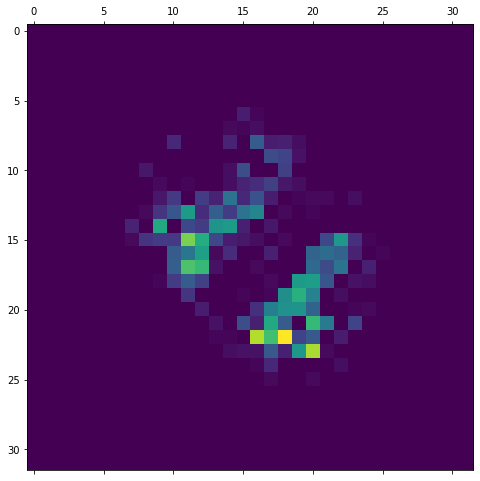

In [122]:
plt.rcParams["figure.figsize"] = (8,8)
plt.matshow(data[gene_id])

### Plotting overlay with histological image

We want to create a plot of an image taken with microscope overlayed with the gene counts.  
Since this image has a high resolutions we need to first upscale the coordinates accordingly using the transformaion that comes with the dataset.

In [28]:
img = plt.imread('/content/drive/MyDrive/Colab Notebooks/HE_Rep1.jpg')

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (92080232 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


In [29]:
img.shape

(9931, 9272, 3)

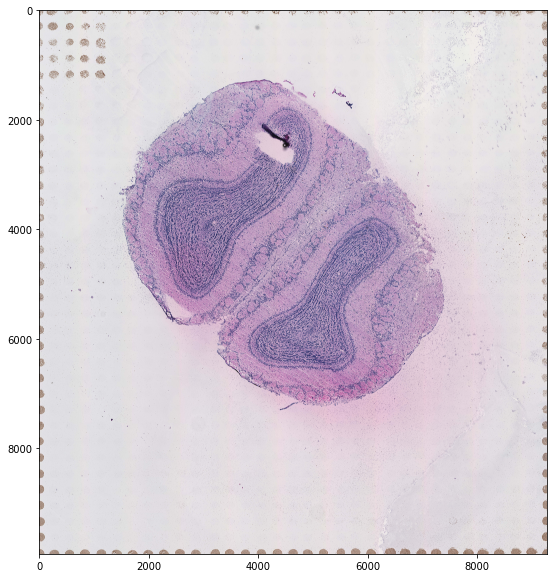

In [30]:
plt.rcParams["figure.figsize"] = (10,10)
plt.imshow(img)

In [31]:
file = open('/content/drive/MyDrive/Colab Notebooks/Rep1_MOB_transformation.txt','r')
for line in file:
    split = line.split(' ')
align = [float(i) for i in split]

print(align)

[289.75, 0.0, 0.0, 0.0, 292.08, 0.0, -289.75, -292.08, 1.0]


In [32]:
#alignments are used to scale and shift the coordinates to match the histological picture
x_up = [i*align[0]+align[6] for i in x]
y_up = [i*align[4]+align[7] for i in y]

In [33]:
print(x_up[:5])
print(y_up[:5])

[4636.5795, 4893.58775, 5463.23625, 5186.525, 5768.63275]
[2332.84296, 2334.3033600000003, 2333.1350399999997, 2329.92216, 2896.26528]


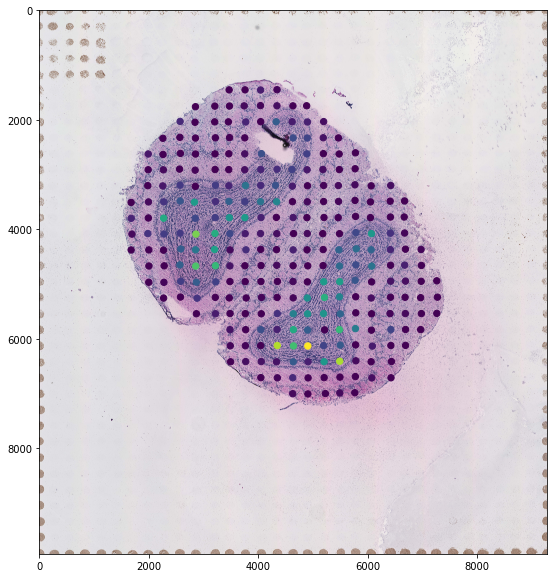

In [34]:
#list of gene counts for penk
spots = data_orig.loc[:,'Penk']

plt.scatter(x_up, y_up, c = spots, s = 40)
plt.imshow(img)

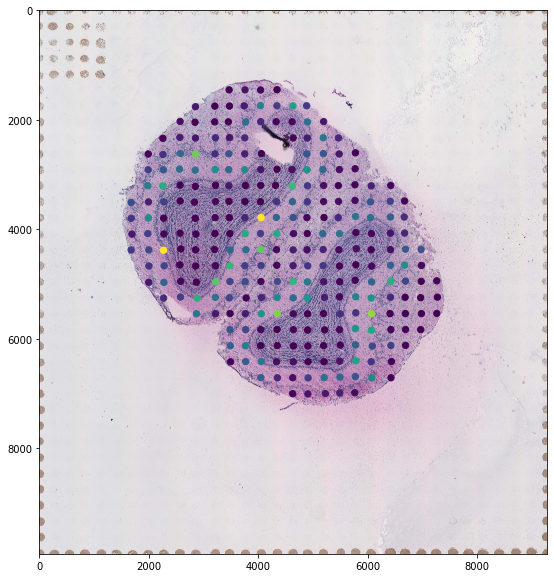

In [35]:
spots = data_orig.loc[:,'Doc2g']

plt.scatter(x_up, y_up, c = spots, s = 40)
plt.imshow(img)

### Scatter plot of gene expressions in two areas

We select three areas and compare the average gene counts in scatter plots.

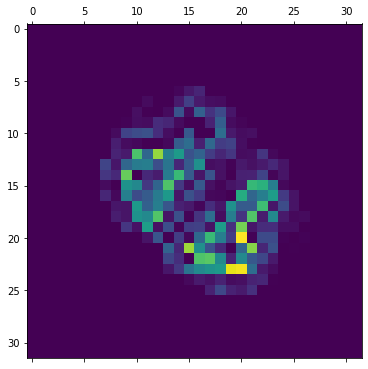

In [36]:
plt.rcParams["figure.figsize"] = (6,6)
gene_id = names.index('Gad1')
plt.matshow(data[gene_id])

Define the three areas by these coordinate pairs

In [37]:
area_a = [(15,9),(15,10),(15,11),
          (16,9),(16,10),(16,11),
          (17,9),(17,10),(17,11)]

area_b = [(21,17),(21,18),(21,19),
          (22,17),(22,18),(22,19),
          (23,17),(23,18),(23,19)]

area_c = [(17,15),(15,17),(14,19),
          (16,18),(16,16),(19,14),
          (21,12),(18,16),(17,17)]

To visualize we create three matrices which highlight the areas and plot them

In [38]:
mat_a = np.zeros( (32,32) )
for c in area_a:
    x=c[1]
    y=c[0]
    mat_a[y,x] = 2
    
mat_b = np.zeros( (32,32) )
for c in area_b:
    x=c[1]
    y=c[0]
    mat_b[y,x] = 3
    
mat_c = np.zeros( (32,32) )
for c in area_c:
    x=c[1]
    y=c[0]
    mat_b[y,x] = 4

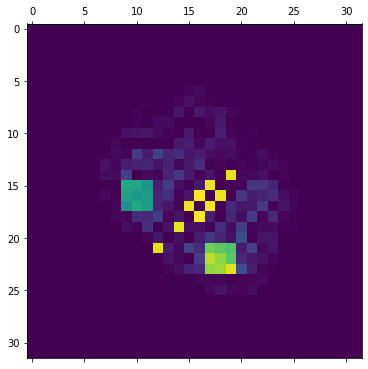

In [39]:
plt.matshow(mat_b+mat_a+mat_c+data[gene_id])

Next we average the gene counts in the three areas

In [40]:
count_a = np.zeros( len(data) )
for c in area_a:
    x=c[1]
    y=c[0]
    count_a = count_a + data[:,y,x]
count_a = count_a / 9

count_b = np.zeros( len(data) )
for c in area_b:
    x=c[1]
    y=c[0]
    count_b = count_b + data[:,y,x]
count_b = count_b / 9

count_c = np.zeros( len(data) )
for c in area_c:
    x=c[1]
    y=c[0]
    count_c = count_c + data[:,y,x]
count_c = count_c / 9

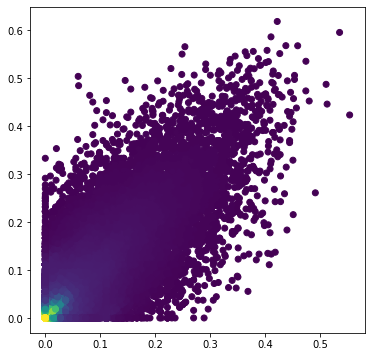

In [41]:
# Calculate the point density
# gaussian_kde(kernel density estimation) is a way to estimate the probability density function (PDF) of a random variable

from scipy.stats import gaussian_kde
xy = np.vstack([count_a,count_b])
z = gaussian_kde(xy)(xy)

plt.scatter(count_a, count_b, c=z)

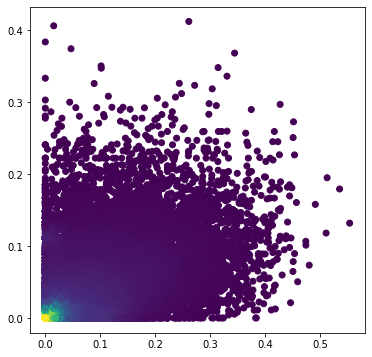

In [42]:
xy = np.vstack([count_a,count_c])
z = gaussian_kde(xy)(xy)

plt.scatter(count_a, count_c, c=z)

Calculate pearson correlation, as expected the similar regions a and b are higher correlated than a and c

In [43]:
from scipy.stats import pearsonr

print('pearson a,b: ', pearsonr(count_a, count_b))
print('pearson a,c: ', pearsonr(count_a, count_c))

pearson a,b:  (0.7668108660328967, 0.0)
pearson a,c:  (0.45727416113629277, 0.0)


### Dimensional reduction

We will use two techniques for dimensional reduction: PCA and t-sne.  
First we choose three areas which correspond to morphological layers and will only consider these for PCA.

To this end we create three lists which contain the locations of above-average expression for the genes Penk, Doc2g and Kctd12

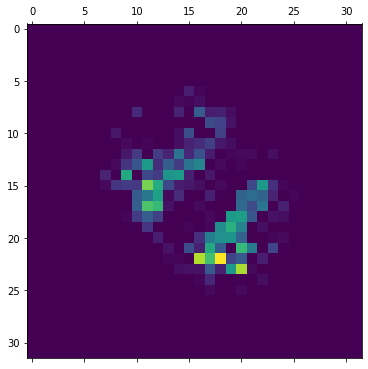

In [44]:
gene_id = names.index('Penk')
plt.matshow(data[gene_id])

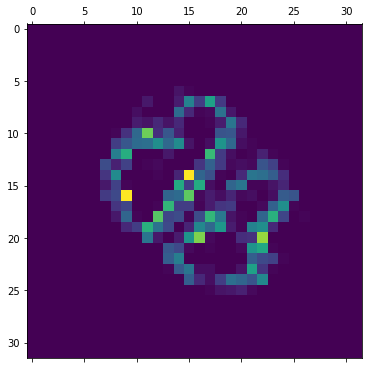

In [45]:
gene_id = names.index('Doc2g')
plt.matshow(data[gene_id])

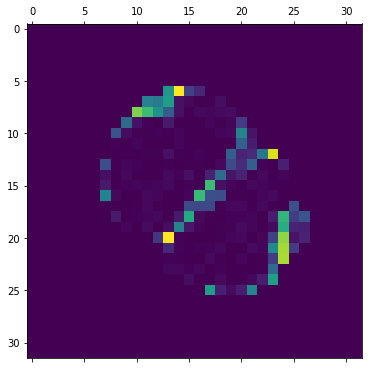

In [46]:
gene_id = names.index('Kctd12')
plt.matshow(data[gene_id])

In [47]:
Penk_avg = np.average(data_orig['Penk'])
Doc2g_avg = np.average(data_orig['Doc2g'])
Kctd12_avg = np.average(data_orig['Kctd12'])

layer1 = []
for i,j in enumerate(data_orig['Penk']):
    if(j > 1.2*Penk_avg): layer1.append(i)
        
layer2 = []
for i,j in enumerate(data_orig['Doc2g']):
    if(j > 1.2*Doc2g_avg): layer2.append(i)
        
layer3 = []
for i,j in enumerate(data_orig['Kctd12']):
    if(j > 1.2*Kctd12_avg): layer3.append(i)
        
#We stack the lists together, these are the locations we consider for PCA
layer_all = layer1+layer2+layer3

In [48]:
from sklearn.decomposition import PCA
#Create object from class PCA
pca = PCA(n_components=2)

In [49]:
#Only keep data for the chosen position, omit column with coordinates
data_reduced = data_orig.iloc[layer_all,1:]

In [50]:
layer_all[:10]

[0, 1, 12, 13, 36, 37, 40, 41, 42, 50]

In [51]:
data_reduced.shape

(205, 16573)

In [52]:
data_orig.shape

(267, 16574)

In [53]:
data_pca = pca.fit_transform(data_reduced)

In [54]:
data_pca.shape

(205, 2)

In [55]:
l1 = [1]*len(layer1)
l2 = [2]*len(layer2)
l3 = [3]*len(layer3)

colormap = l1+l2+l3

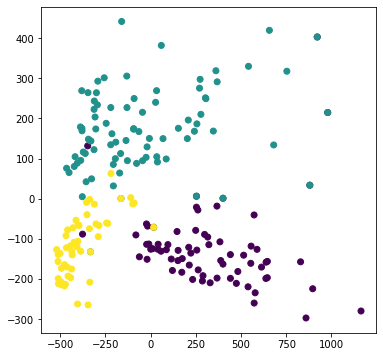

In [56]:
plt.scatter(data_pca[:,0], data_pca[:,1], c=colormap)

Now we will perform dimension reduction using t-sne

In [57]:
import numpy as np
from sklearn.manifold import TSNE

In [58]:
data_embedded = TSNE(n_components=2).fit_transform(data_reduced)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [59]:
data_embedded.shape

(205, 2)

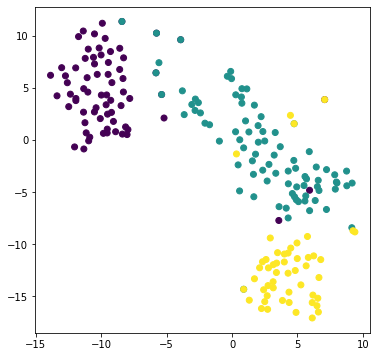

In [60]:
plt.scatter(data_embedded[:,0], data_embedded[:,1], c=colormap)

In [61]:
# umap may be difficult on colab. make sure to install umap-learn
# https://stackoverflow.com/questions/57242208/how-to-resolve-the-error-module-umap-has-no-attribute-umap-i-tried-installi
#!pip uninstall umap
!pip install 'umap-learn==0.3.10'

     |████████████████████████████████| 40 kB 3.1 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.3.10-py3-none-any.whl size=38881 sha256=4a316fd76a64ebefd1982e8a8bb1a290f1375da68cf22a3088407c0c62d1d677
  Stored in directory: /root/.cache/pip/wheels/ea/d0/8f/9e64bfc5ed0645f89b639196bef92daf5c704285133efce12f
Successfully built umap-learn


In [62]:
import umap.umap_ as umap

In [63]:
reducer2d = umap.UMAP(n_components=2)

In [64]:
data_umap2d = reducer2d.fit_transform(data_reduced)

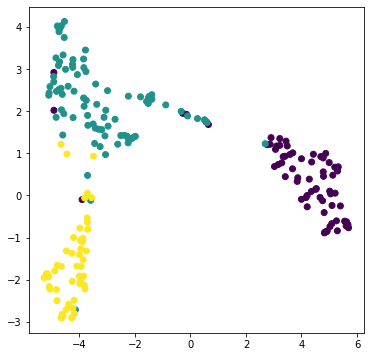

In [65]:
plt.scatter(data_umap2d[:,0], data_umap2d[:,1], c=colormap)

In [66]:
# UMAP can have more than 2 dimensions
reducer = umap.UMAP(n_components=3)
data_umap = reducer.fit_transform(data_orig.iloc[:,1:])
data_umap.shape

(267, 3)

In [67]:
#Postprocess to turn into displayable image

def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    
    x += 0.5
    x = np.clip(x, 0, 1)
    
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [68]:
mats1 = []
for i in range(3):
    mat = np.zeros([32,32])
        #fill spatial arrays for each gene
    for x_, y_, val in zip(x_round, y_round, data_umap[:,i]):
        mat[y_,x_] = val
    mat = deprocess_image(mat)
    mats1.append(mat)
mats1 = np.stack(mats1, axis=2)

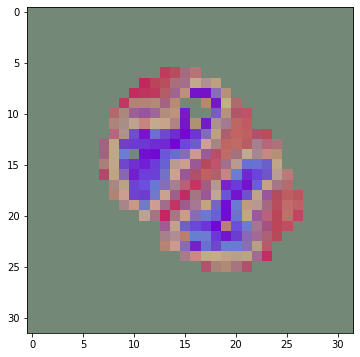

In [69]:
plt.imshow(mats1)

In [70]:
data_tsne3d = TSNE(n_components=3).fit_transform(data_reduced)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [71]:
mats2 = []
for i in range(3):
    mat = np.zeros([32,32])
        #fill spatial arrays for each gene
    for x_, y_, val in zip(x_round, y_round, data_tsne3d[:,i]):
        mat[y_,x_] = val
    mat = deprocess_image(mat)
    mats2.append(mat)
mats2 = np.stack(mats2, axis=2)

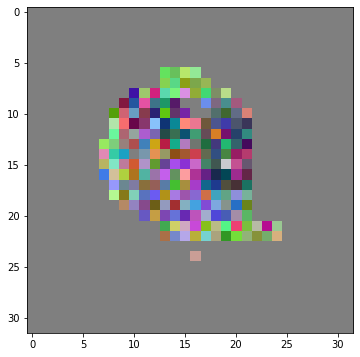

In [72]:
plt.imshow(mats2)

**HOMEWORK 2** 

Apply VAE on the above ST data. Modify the earlier VAE architecture (used on MNIST), such as input data dimensions and other parameters (strides, layers, etc). Keep the 2 dimensions as latent variables.

*   Visualize the latent variables in a scatter plot.
*   For 3 randomly chosen genes, visualize the input data and reconstructed data as 2D heatmaps.

Make sure to submit the jupyterlab code.

In [127]:
import keras
from keras import layers
from keras import backend as K
from keras.models import Model
import tensorflow as tf
import math
%tensorflow_version 1.x
print(tf.__version__)
tf.compat.v1.disable_eager_execution()

img_shape = (32, 32, 1)
batch_size = 32
latent_dim = 2

x = [float(i.partition('x')[0]) for i in data_orig.iloc[:,0]]
y = [float(i.partition('x')[2]) for i in data_orig.iloc[:,0]]
x_round = [int(i+0.5) for i in x] 
y_round = [int(i+0.5) for i in y]
data = []
    
#loop over genes
for i in range(1,data_orig.shape[1]):
    mat = np.zeros([32,32])
    #fill spatial arrays for each gene
    for x_, y_, val in zip(x_round, y_round, data_orig.iloc[:,i]):
        mat[y_,x_] = val
    #scaling the data on each gene from 0 to 1
    mat = mat/(mat.max())
    data.append(mat)
data = np.array(data)

#Define encoder network
#Note that we are using keras functional API
input_img = keras.Input(shape=img_shape)
x = layers.Conv2D(32, 3, padding='same', activation='relu')(input_img)
x = layers.Conv2D(64, 3, padding='same', activation='relu',strides=(2, 2))(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)


shape_before_flattening = K.int_shape(x)
x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)

z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)

#Sampling from the distributions to obtain latent space
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
    mean=0., stddev=1.)
    return z_mean + K.exp(z_log_var) * epsilon
z = layers.Lambda(sampling)([z_mean, z_log_var])

encoder = Model(input_img, z)

#Define decoder network
decoder_input = layers.Input(K.int_shape(z)[1:])
x = layers.Dense(np.prod(shape_before_flattening[1:]), activation='relu')(decoder_input)
x = layers.Reshape(shape_before_flattening[1:])(x)
x = layers.Conv2DTranspose(32, 3,padding='same', activation='relu', strides=(2, 2))(x)
x = layers.Conv2D(1, 3,padding='same', activation='sigmoid')(x)

decoder = Model(decoder_input, x)
z_decoded = decoder(z)

def vae_loss(input_img, z_decoded):
    input_img = K.flatten(input_img)
    z_decoded = K.flatten(z_decoded)
    xent_loss = keras.metrics.binary_crossentropy(input_img, z_decoded) 
    kl_loss = -5e-4 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return K.mean(xent_loss + kl_loss)

vae = Model(input_img, z_decoded)
vae.compile(optimizer='adam', loss=vae_loss)

vae.summary()
decoder.summary()

# Split the data into train and test datasets
split_nb = round(len(data) * 0.8)

x_train = data[:split_nb]
x_test = data[split_nb:]
x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape(x_train.shape + (1,))
x_test = x_test.astype('float32') / 255.
x_test = x_test.reshape(x_test.shape + (1,))

TensorFlow is already loaded. Please restart the runtime to change versions.
2.8.0
Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 1)]  0           []                               
                                                                                                  
 conv2d_15 (Conv2D)             (None, 32, 32, 32)   320         ['input_1[0][0]']                
                                                                                                  
 conv2d_16 (Conv2D)             (None, 16, 16, 64)   18496       ['conv2d_15[0][0]']              
                                                                                                  
 conv2d_17 (Conv2D)             (None, 16, 16, 64)   36928       ['conv2d_16[0][0]']              
        

In [128]:
# Fit model 
vae.fit(x=x_train, y=x_train, shuffle=True, epochs=10, batch_size=batch_size)

Train on 13258 samples
Epoch 1/10
13258/13258 [==============================] - 94s 7ms/sample - loss: 0.0282
Epoch 2/10
13258/13258 [==============================] - 146s 11ms/sample - loss: 8.4853e-04
Epoch 3/10
13258/13258 [==============================] - 133s 10ms/sample - loss: 7.7421e-04
Epoch 4/10
13258/13258 [==============================] - 100s 8ms/sample - loss: 7.5940e-04
Epoch 5/10
13258/13258 [==============================] - 93s 7ms/sample - loss: 7.5389e-04
Epoch 6/10
13258/13258 [==============================] - 94s 7ms/sample - loss: 7.5143e-04
Epoch 7/10
13258/13258 [==============================] - 93s 7ms/sample - loss: 7.5000e-04
Epoch 8/10
13258/13258 [==============================] - 94s 7ms/sample - loss: 7.4883e-04
Epoch 9/10
13258/13258 [==============================] - 109s 8ms/sample - loss: 7.4763e-04
Epoch 10/10
13258/13258 [==============================] - 122s 9ms/sample - loss: 7.4624e-04


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


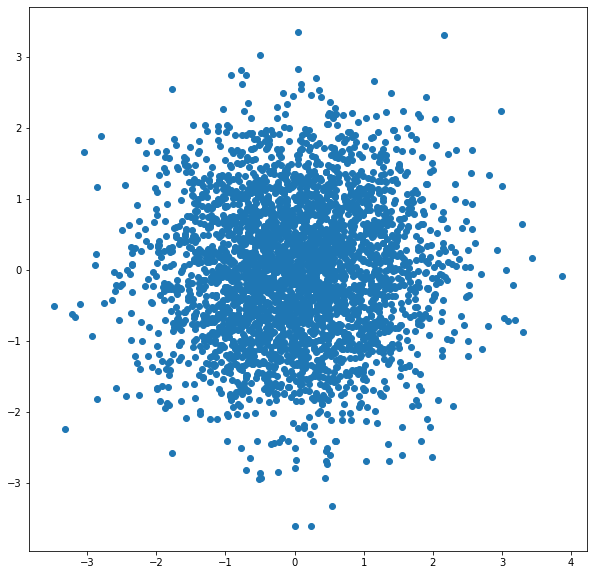

In [129]:
# Latent variables
x_test_encoded = encoder.predict(x_test)
plt.figure(figsize=(10, 10))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1])
plt.show()

In [135]:
def make_heatmaps(nb_img, chosen1, chosen2):
  def interpolate(vec1, vec2, nb=nb_img):
    linspace = np.linspace(0, 3, num=nb)
    vectors = []
    for lin in linspace:
      v_new = (1.0 - lin) * vec1 + lin * vec2
      vectors.append(v_new)
    return np.asarray(vectors)

  encoded_1 = x_test_encoded[chosen1]
  encoded_2 = x_test_encoded[chosen2]
  
  interpolated = interpolate(encoded_1,encoded_2)

  decoded_ready = decoder.predict(interpolated).reshape(nb_img, 32, 32)

  for number, param in enumerate(decoded_ready):  
      print('Image num: ', number+1)
      plt.matshow(decoded_ready[number])
      plt.show()


Image num:  1


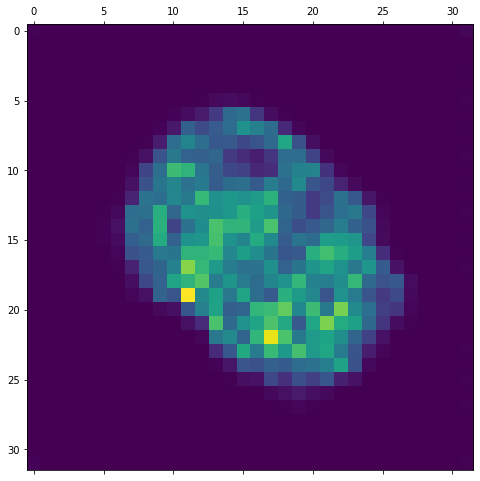

Image num:  2


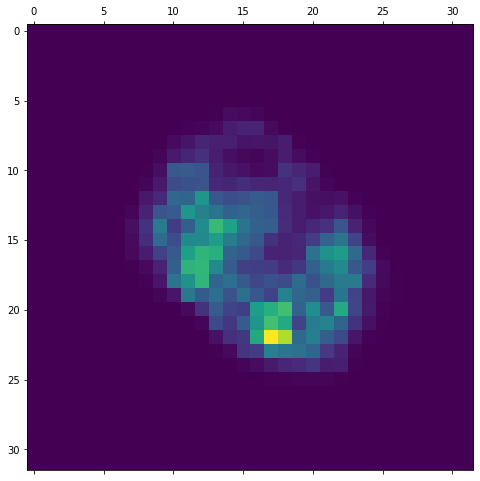

Image num:  3


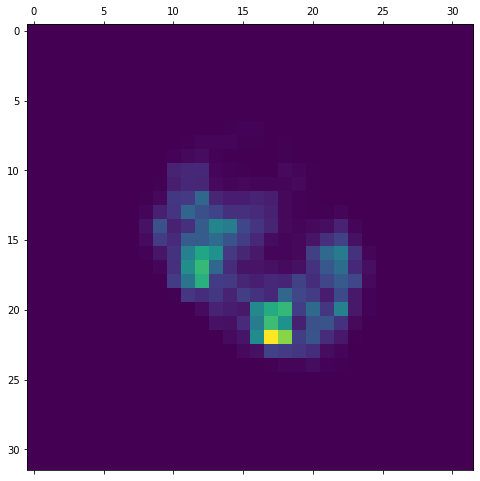

In [136]:
make_heatmaps(3, 2, 5)

Image num:  1


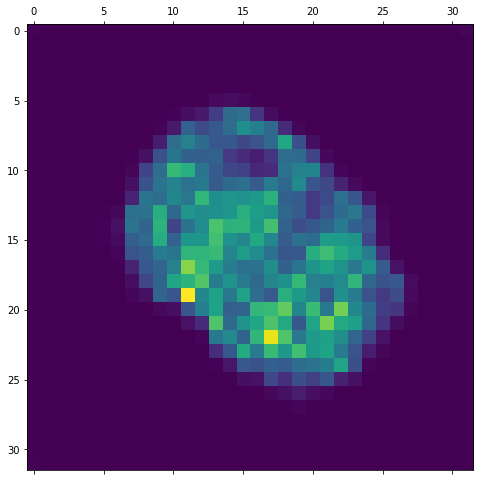

Image num:  2


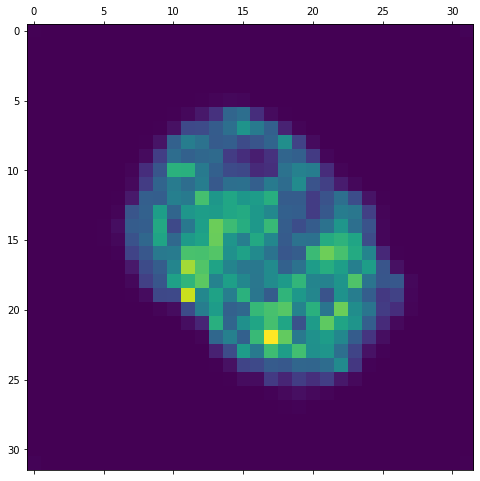

Image num:  3


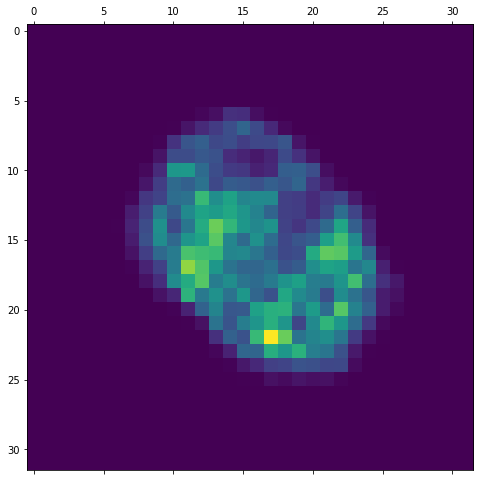

In [139]:
make_heatmaps(3, 4, 8)

Image num:  1


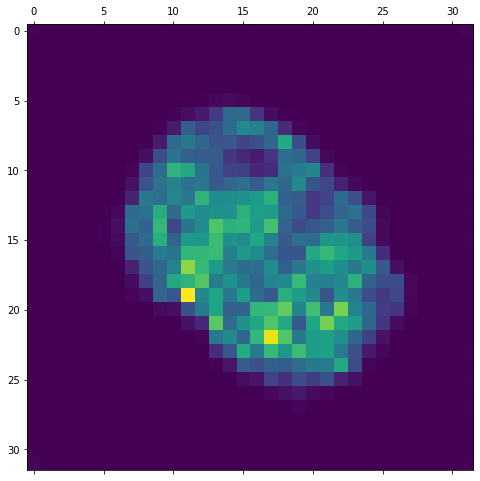

Image num:  2


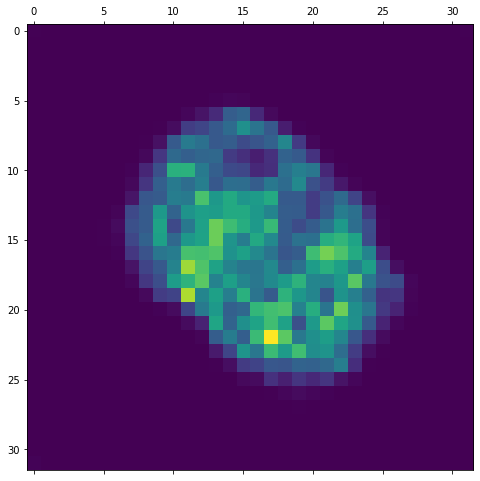

Image num:  3


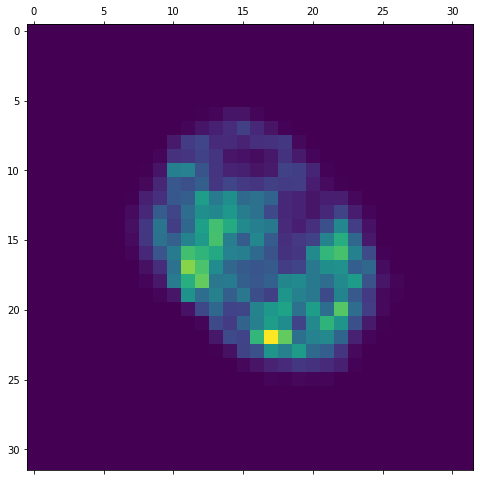

In [140]:
make_heatmaps(3, 1, 8)